### 목표
 - 버섯의 특징을 활용해 독/식용 이진 분류 해보자
 - Decision Tree 모델 활용해보자
 - Decision Tree 학습 현황 시각화 & 과대적합 제어 (하이퍼 파라미터 튜닝)
 - 특성의 중요도를 파악 확인하기 (불순한 정도를 파악하는 것, 지니 불순도)
 - 183 페이지 확인하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# train, test 랜덤샘플링 도구
from sklearn.model_selection import train_test_split
# knn 모델 from sklearn.neighbors import KNeighborsClassifier
# tree 분류 모델
from sklearn.tree import DecisionTreeClassifier

### 데이터 불러오기

In [2]:
# data 변수에 담아주기
# data 폴더에 있는 mushroom 가져오기
pd.options.display.max_columns = None # 모든 컬럼을 표시
# pd.set_option('display.max_columns', None)
data = pd.read_csv('./data/mushroom.csv')

# 정보 확인
data.info()
# 데이터 타입 object, 결측치 X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
data
# stalk-root : ? 데이터가 들어있다.
# 모든 컬럼에는 문자열 데이터만 들어있다.

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


### 데이터 전처리 및 탐색
 - 문제(특성)와 답(레이블) 분리
 - X, y 통계량 확인 
 - 머신러닝 모델은 숫자만을 인식할 수 있음 : 문자 > 숫자
 - 훈련셋, 테스트셋 분리

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
# poisonous -> y
# poisonous 제외한 나머지 컬럼 -> X
# X = data.iloc[:, 1:]
X = data.iloc[:, 1:]
# data.iloc[:, 1:]
# data.loc[:, 'cap-shape':]
# data.drop('poisonous', axis = 1) # data 변수에 초기화 x
# y = 
y = data['poisonous']
# data.iloc[:, 0]
# data.loc[:, 'poisonous']

In [6]:
# 통계량 확인해보기
# describe()
X.describe()
# 문자 데이터(범주 데이터)에 대한 통계는
# 최빈값(freq), 유니크한 값을 표현해 줌

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
# y 클래스(카테고리) 개수 확인
# 클래스의 다양성이 유지되는 지 확인
y.value_counts()
# 식용 버섯에 대한 클래스가 300여개 정도 더 많은 상황

e    4208
p    3916
Name: poisonous, dtype: int64

- 문자 > 숫자 : encoding(인코딩)
    - 데이터 값의 크고 작음이 의미가 없을 때 : 원핫 인코딩
    - 데이터 값의 크고 작음이 의미가 있을 때 : 레이블 인코딩

In [8]:
X_one_hot = pd.get_dummies(X)
X_one_hot 
# 원핫인코딩 단점 : 용량

# 크기 확인
print(X_one_hot.shape)

(8124, 117)


In [9]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object

In [10]:
# 훈련셋, 테스트셋 분리
# 7:3
# 랜덤 스테이트 7
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.3, random_state = 7)

# 크기확인
print('훈련 셋:',X_train.shape, y_train.shape)
print('테스트 셋:',X_test.shape, y_test.shape)

훈련 셋: (5686, 117) (5686,)
테스트 셋: (2438, 117) (2438,)


### 모델링
 - 모델 생성
 - 모델 학습
 - 교차 검증 진행해보기
 - 모델 예측 및 평가
 - 특성의 중요도 확인
 - 학습 현황 시각화 ( tree - white box )
 - 과대적합을 제어하는 파라미터 연결해보기

In [11]:
# 하이퍼 파라미터를 별도 정의 X - 기본값으로 연결
# tree_model 변수에 모델 생성
tree_model = DecisionTreeClassifier()
tree_model

# 모델 학습
# fit(훈련문제, 훈련답)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

#### 교차검증 : 
 - 모델의 일반화 성능 확인
 - 모든 데이터에 대해 모델이 얼마나 잘 맞추는 지 평가, 한 번 나눠서 평가하는 것보다 여러 번 하기 때문에 더 안정적인 통계적 평가 방법
 - 방법론 : 훈련 세트와 테스트 세트로 여러 번 나눠서 평가
 - 진행 시점 : 모델을 생성하고 학습하기 전에도 진행 가능

In [13]:
# 도구 불러오기
from sklearn.model_selection import cross_val_score

In [14]:
# estimator : 예측기 -> 모델명
# X, y : 문제, 답데이터
# cv(cross validation) : 교차검증 횟수(테스트를 분리할 횟수)
# tree_model한테 X_train, y_train 활용해서 5번의 교차검증 함
cv_result = cross_val_score(tree_model,
                            X_train,
                            y_train,
                            cv = 5)
print('교차검증 결과 : ', cv_result)
print('교차검증 평균 : ', cv_result.mean())
# 5번 진행한 후 결과가 대부분 100% 성능을 내고 있음
# 나름대로 신뢰할 만한 모델임
# 모델이 학습을 잘 했음
# -> 모델의 하이퍼 파라미터를 제어하지 않아도 내부 규칙 생성이 알맞게 됨
# p, e인지 판단하기 위한 특성 설명이 충분했음(데이터가 좋았음)
# 하이퍼 파라미터를 제어하지 않아도 되는 상황

교차검증 결과 :  [1.         1.         1.         0.99912049 1.        ]
교차검증 평균 :  0.9998240985048372


In [15]:
# test 예측
# 모델.predict(문제)
pre = tree_model.predict(X_test)
pre

# 평가 : accuracy_score
# from sklearn.metrics import accuracy_score # 정확도 지표
# accuracy_score(y_test, pre)
# 모델.score(테스트문제, 테스트답)
tree_model.score(X_test, y_test) # accuracy 정확도

1.0

#### 특성 중요도
 - 모델 특성 선택 확인하기
 - feature importances 확인하기

In [16]:
X_train.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [17]:
fi = tree_model.feature_importances_
fi.size

117

In [18]:
# 특성 중요도 np 배열 -> df 변환하면서 컬럼명 연결하기
fi_df = pd.DataFrame(fi, index = X_train.columns,
                    columns = ['feature importances'])
# 내림차순 정렬 ( 높은 -> 낮은 값)
fi_df['feature importances'].sort_values(ascending = False)
fi_df.sort_values(by = 'feature importances', ascending = False)

,feature importances
odor_n,0.608902
stalk-root_c,0.181454
stalk-surface-below-ring_y,0.098180
spore-print-color_r,0.036178
odor_l,0.025074
...,...
gill-color_g,0.000000
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_n,0.000000


In [19]:
# 학습시킨 트리모델의 현황을 추출하는 코드
from sklearn.tree import export_graphviz
export_graphviz(tree_model, # 추출할 모델
                out_file='tree.dot', # 저장 경로 및 파일명
                class_names=['독','식용'], # 클래스 이름 표현 설정
                feature_names=X_one_hot.columns, # 컬럼명 이름 표현 설정
                impurity=False, 
                filled=True) # 색상 채움

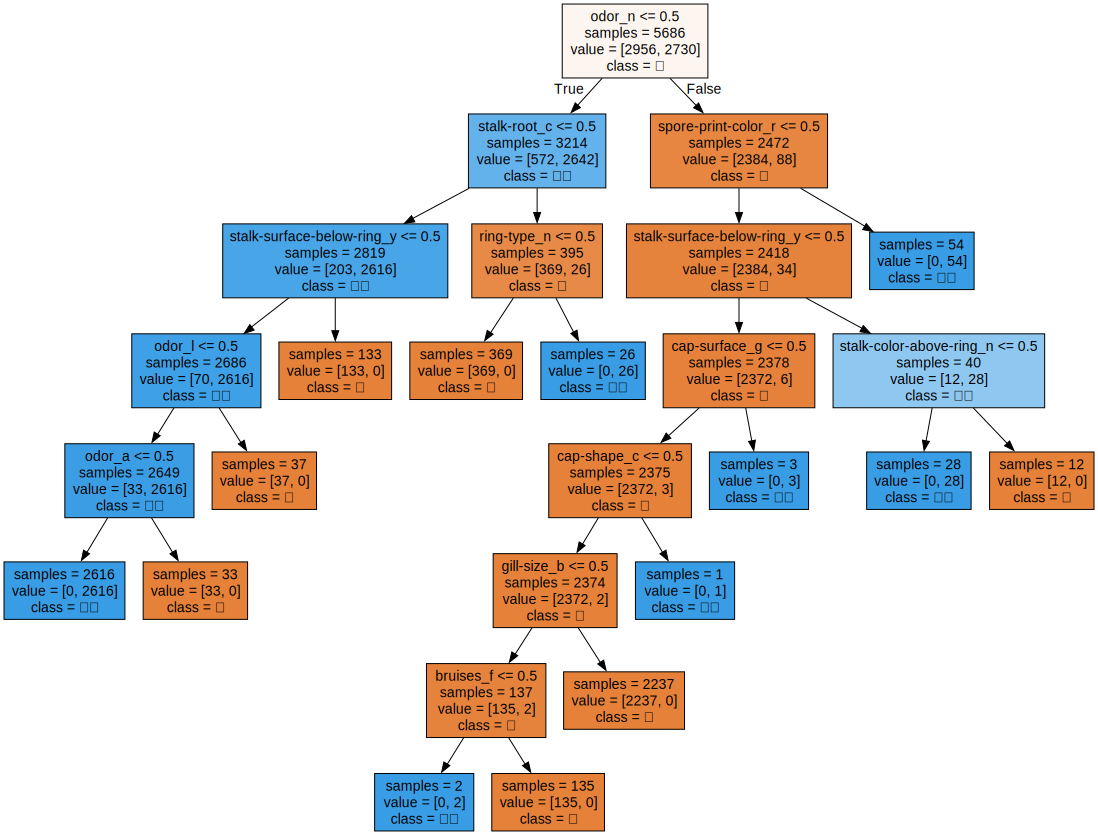

In [20]:
# tree.dot 불러오면서 시각화(그래프화)
import graphviz

# 파일 다루는 파이썬 코드
with open('tree.dot', encoding = 'UTF-8') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

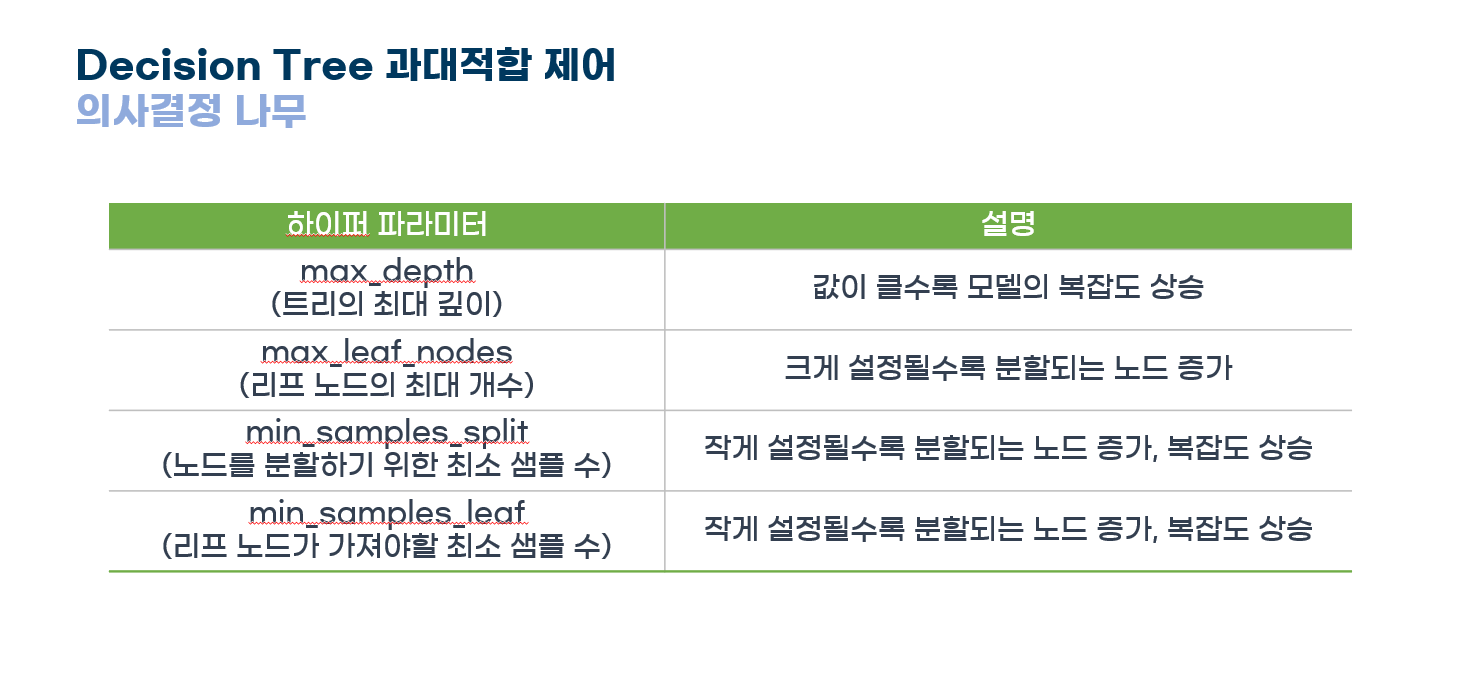

#### 과대적합 제어 후 시각화 확인
 - tree 하이퍼 파라미터 종류 4가지가 존재
   - max_depth : 최대 깊이
   - max_leaf_nodes : 최대 리프 노드 개수(개수가 많다라는 건 깊이가 깊어진다는 뜻)
   - min_samples_split : 노드를 분할하기 위한 최소 샘플 수  
   - min_samples_leaf : 분리되고 난 후 노드의 시점 / 리프 노드가 가져야 할 최소 샘플 수
   - 종합적으로, 트리 모델의 깊이를 제어하는 파라미터

In [22]:
# 모델의 깊이를 설정하는 매개변수 연결 : max_depth
tree_model2 = DecisionTreeClassifier(max_depth = 3)
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
# Q. 교차검증 진행해보기
# 횟수 5, tree_model2, train 데이터로 입력
cv_result2 = cross_val_score(tree_model2,
                            X_train,
                            y_train,
                            cv = 5)
print('교차검증 결과 : ', cv_result2)
print('교차검증 평균 : ', cv_result2.mean())

교차검증 결과 :  [0.98242531 0.98680739 0.98504837 0.97977133 0.98592788]
교차검증 평균 :  0.9839960553548712


In [25]:
export_graphviz(tree_model2, # 추출할 모델
                out_file='tree.dot', # 저장 경로 및 파일명
                class_names=['독','식용'], # 클래스 이름 표현 설정
                feature_names=X_one_hot.columns, # 컬럼명 이름 표현 설정
                impurity=False, 
                filled=True) # 색상 채움

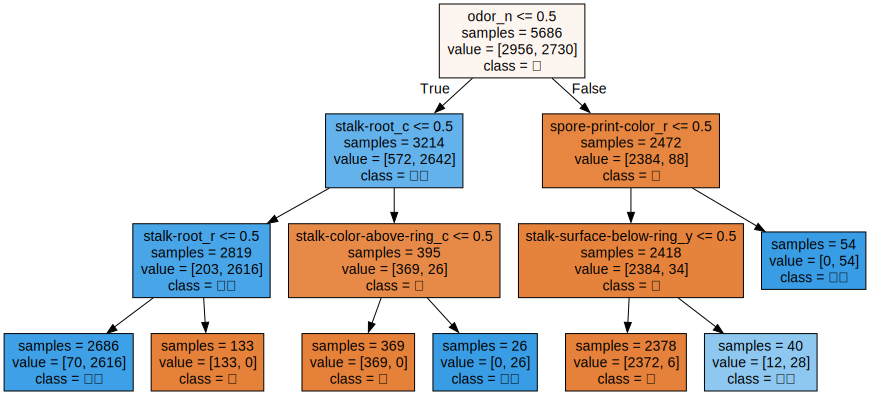

In [26]:
# 파일 다루는 파이썬 코드
with open('tree.dot', encoding = 'UTF-8') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [ ]:
# 현재 버섯 분류하는 상황에서는 제어할 필요가 없지만
# 다른 데이터를 활용해 학습을 진행할 때에는 일반적으로 
# 끝까지 학습하게, 규제하지 않으면 과대적합에 걸릴 확률이 높음 